# <font color="green">Homework</font> - Quantum Phase : <font color="blue"> Quirk</font>

> Use the **QUIRK Quantum Gate Fremework** to create your own Quantum Circuits involving Phase Rotations.
- start with a blank circuit 
- install a H (Hadamard) gate
- install a R(z) from under the "Formulaic Heading **Rz(f(t))**" <font color="blue">- I was not able to edit the Rz(f(t)) in the jupyter notebook, so worked on the QUIRK site. </font>
- *change the formula* from the stock "pi t^2" (to your version using a derivative of **"pi"**) 
- make sure you use the multiplication operator <font color="red">*</font> in your formula if you ever multiply Pi by a number. <font color="blue"> - (pi * 1/4), (pi * 3/4), (pi * 1.12), (pi * 5/4), (pi * 1.37) </font>
- notice that w/out the "t" flag, the circuts output defaults to only a point, and not an animation
- notice where that point lands on the bloch sphere
- correlate that with your experiences using the Bloch Sphere Playground Application (for the same rotations) and try to get consistent results with your rotations between the two tools.
- iterate on the above (5 or 6 diferent times) altering your "formula" each iteration to see how the simulator behaves 

**NOTE:** - this is meant to **develop an intitution about the phase rotations** on the bloch sphere - very important for programming quantum simulators later on.

In [1073]:
# QUIRK (Quantum Circuit Simulator) of Superposition R(z) Circuit 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[]}', width=900, height=600)

In [1074]:
# Import Qiskit, and set up a Quantum register of 1 Qubit, and set up a Quantum Circuit w/that register

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, execute
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from circle_plot import *
from qiskit.tools.visualization import plot_bloch_multivector
from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec

# Set up a quantum register and a quantum circuit
qr = QuantumRegister(1)
circ = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

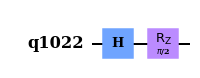

In [1075]:
# Place an H (Hadamard) gate on the circuit
# Note: Qiskit rotates in Radians not Degrees so the correct calculation needs to be made
# Place an Rz gate with a Pi/2 rotation = 90 Degrees 

circ.h(qr[0])
circ.rz( np.pi/2 , qr[0])

# Draw the circuit
circ.draw(output='mpl')

In [1076]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([0.5-0.5j, 0.5+0.5j])

In [1077]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(quantum_state)

Normalized Result:  0.5
Normalized Result:  0.5


The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  -0.7853981633974483
Angle:  -45.0
The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  0.7853981633974483
Angle:  45.0


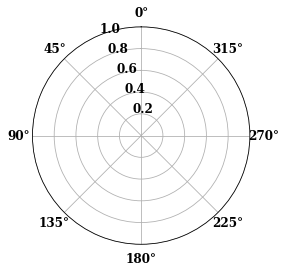

In [1078]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve : appears 90 Degrees
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

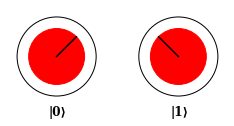

In [1079]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(quantum_state)

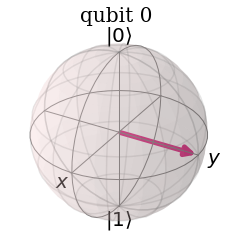

In [1080]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

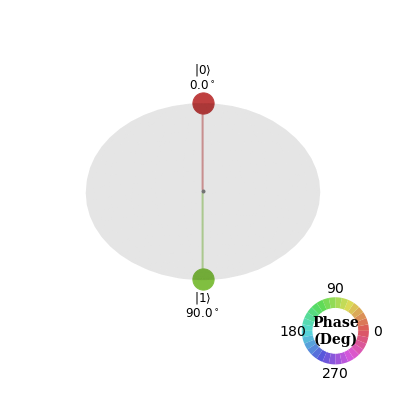

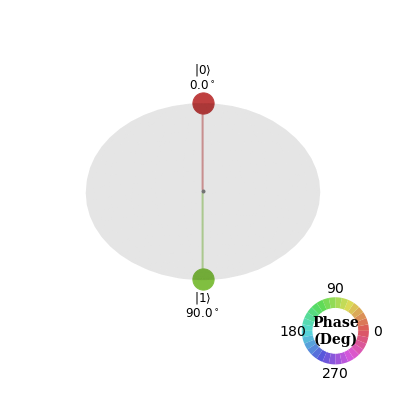

In [1081]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 

In [1082]:
# QCEngine (Quantum Simulator)
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io', width=900, height=600)

In [1083]:
# Bloch Sphere Playground Application
from IPython.display import IFrame
IFrame(src='https://javafxpert.github.io/grok-bloch/', width=900, height=700)

In [1084]:
# QUIRK (Quantum Circuit Simulator) of Above Circuit 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi/2%22}]]}', width=900, height=600)

In [1085]:
# Bloch Sphere Playground Application
from IPython.display import IFrame
IFrame(src='https://javafxpert.github.io/grok-bloch/', width=900, height=700)

![bloch_sphere-magnitudes](img/Bloch-Sphere-Observation.png "bloch_sphere-magnitudes")

-- > **Importantly:** - Executing a **R(<font color="red">y</FONT>)** gate moves the point on the surface of the sphere w/out affecting the **Phase** (those values do not change except at the threshold of **[0:0 and 1:Pi]** ) - only the **Magnitude** Values change.

-- > (<font color="red">When observed the Ry is chaning at 0:0 and 0.96:Pi </FONT>)


In [1086]:
# Import Qiskit, and set up a Quantum register of 1 Qubit, and set up a Quantum Circuit w/that register

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, execute
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec

qr = QuantumRegister(1)
circ = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

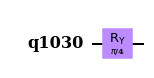

In [1087]:
# Place an Ry gate with a Pi/4 rotation - Magnitude Rotation

circ.ry( np.pi / 4, qr[0])

# Draw the circuit
circ.draw(output='mpl')

In [1088]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([0.924+0.j, 0.383+0.j])

In [1089]:
normalize_state_Vector(quantum_state)

Normalized Result:  0.9
Normalized Result:  0.1


The original complex number Re{0}, Im{0}, and Length : 0.924000
Phase:  0.0
The original complex number Re{0}, Im{0}, and Length : 0.383000
Phase:  0.0


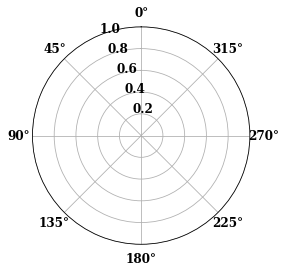

In [1090]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve : appears 90 Degrees
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

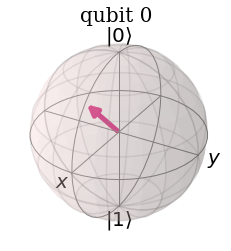

In [1091]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

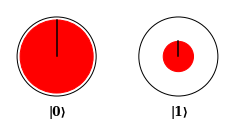

In [1092]:
# Print out Circle Notation

from circle_plot import *
plot_circles(quantum_state)

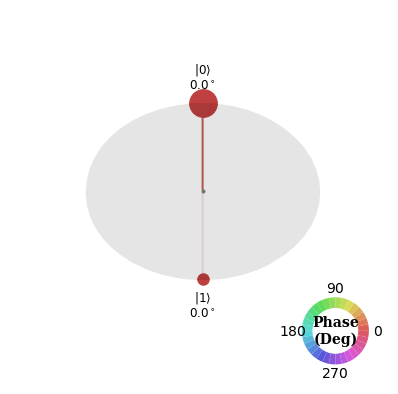

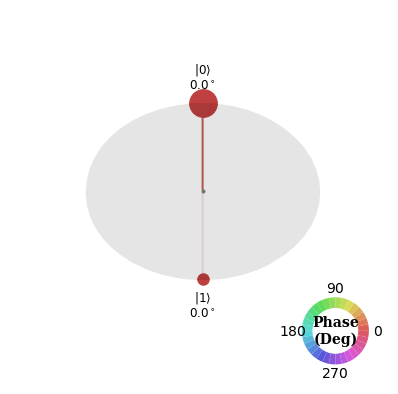

In [1093]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 

In [1094]:
# Bloch Sphere Playground Application
from IPython.display import IFrame
IFrame(src='https://javafxpert.github.io/grok-bloch/', width=900, height=700)

-- > (<font color="red">When did 8 iterations on Rx the phase changed from 0 to 1.32Pi</FONT>)

# <font color="red">Exercise</font> - Quantum Magnitudes : <font color="blue"> Recreate the circuit with QUIRK</font>


#### TODO
- peruse the recreated circuit below - it's set to a different configuration.
- hover over the key areas to view the resultant amplitude values, the probabilities, and Phase values
- adding the R(<font color="red">**y**</font>) gate with the ( Pi ) rotates the point of the sphere surface directly down to |1>.
- realize (by perusing the Bloch Sphere Playground result above) that this executed rotation lands the new bloch sphere point at the amplitude value of **1**.
- notice that the bloch sphere widget is **visually similar** to the Bloch Sphere Playground result and Qiskit plot.
- notice that **Theta** is 180 degrees and **Psi** is 0 Degrees - compare that to the image below for developing intuition about these rotations. 
- also notice that the decimal value 1 Qubit has a probability of 1 - compare that to the Bloch Sphere Playground resultant equation. 

> try that again with the R(<font color="red">**x**</font>) gate with the ( Pi ) rotates the point of the sphere surface directly down to |1>.
- Q: Did anything else change?
  <font color="blue"> Phase changed to -90 for Rx at Pi rotation</font>

In [1095]:
# Import Qiskit, and set up a Quantum register of 1 Qubit, and set up a Quantum Circuit w/that register

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, execute
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt

qr = QuantumRegister(1)
circ = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

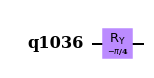

In [1096]:
# Place an Ry gate with a (-3/12 * Pi) rotation

circ.ry( -3/12 * np.pi, qr[0])

# Draw the circuit
circ.draw(output='mpl')

In [1097]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([ 0.924+0.j, -0.383-0.j])

In [1098]:
normalize_state_Vector(quantum_state)

Normalized Result:  0.9
Normalized Result:  0.1


The original complex number Re{0}, Im{0}, and Length : 0.924000
Phase:  0.0
The original complex number Re{0}, Im{0}, and Length : 0.383000
Phase:  -3.141592653589793
Angle:  -180.0


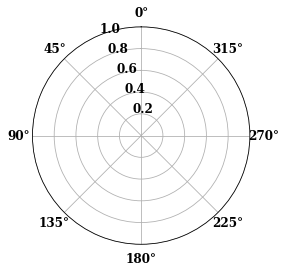

In [1099]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve 
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

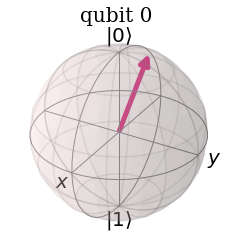

In [1100]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

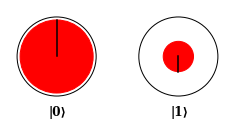

In [1101]:
# Print out Circle Notation

from circle_plot import *
plot_circles(quantum_state)

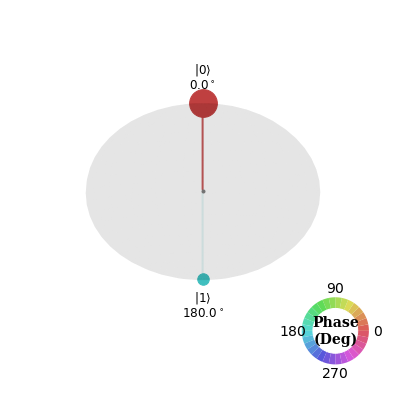

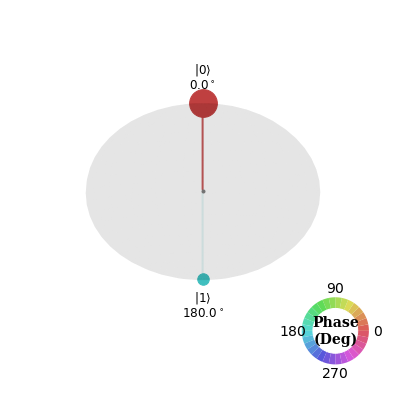

In [1102]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 

In [1103]:
# Import Qiskit, and set up a Quantum register of 1 Qubit, and set up a Quantum Circuit w/that register

import numpy as np
from qiskit import Aer, QuantumCircuit, QuantumRegister, execute
from qiskit.visualization import plot_histogram
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_bloch_multivector
from IPython.display import display, Math, Latex
from circle_plot import *
from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec


qr = QuantumRegister(1)
circ = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

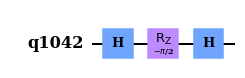

In [1104]:
## QCEngine Constructed SQRT(NOT) Function 
## ( H + [-P90] + H )

# Place an H (Hadamard) gate on the circuit
# Note: Qiskit rotates in Radians not Degrees so the correct calculation needs to be made
# Place an Rz gate with a Pi/2 rotation = 90 Degrees 

# First Root of Not Gate (Establish)
circ.h(qr[0])
circ.rz( -np.pi/2 , qr[0]) # 90 Degree Phase Rotation (using negative for consistency)
circ.h(qr[0])

# [Uncomment to illustrate]
#
# Second Root of Not Gate (Reverse) 
# circ.h(qr[0])
# circ.rz( -np.pi/2 , qr[0]) # 90 Degree Phase Rotation (using negative for consistency)
# circ.h(qr[0])



# Draw the circuit
circ.draw(output='mpl')

In [1105]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([0.707+0.j   , 0.   +0.707j])

In [1106]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(quantum_state)

Normalized Result:  0.5
Normalized Result:  0.5


The original complex number Re{0}, Im{0}, and Length : 0.707000
Phase:  0.0
The original complex number Re{0}, Im{0}, and Length : 0.707000
Phase:  1.5707963267948966
Angle:  90.0


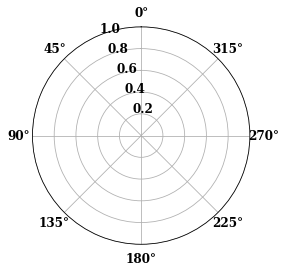

In [1107]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve : appears 90 Degrees
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

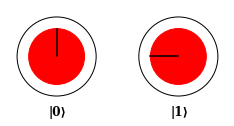

In [1108]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(quantum_state)

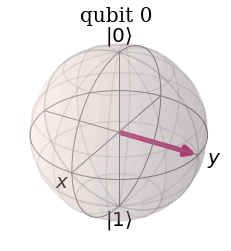

In [1109]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

In [1110]:
quantum_state

array([0.707+0.j   , 0.   +0.707j])

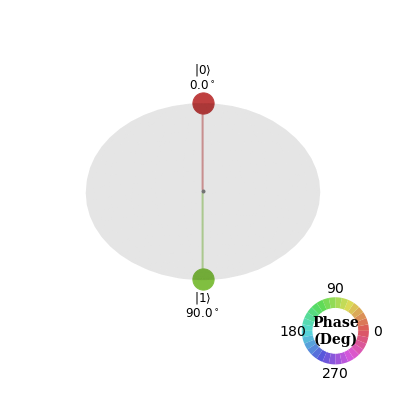

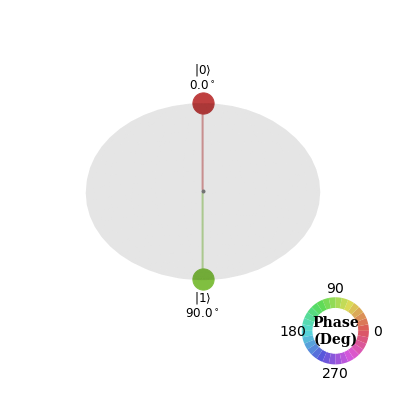

In [1111]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 

# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>

## The Qubit and the Bloch Sphere

#### <font color="blue">*This work will take some time, so block off enough time to adequately cover it*</font>. 

- Go through the **entire** JNB and complete each of the exercises, including any supplementary Video's - hand in completed <font color="red">**PDF**</font> from this JNB once finished.


- Step through the code for **each** of the above exercises, make sure you can (1) execute it, and (2) know what it does.


- <font color="blue">Complete Challenge Exercises below.</font> **(turn in the JNB)**

> 0. **Level 1 Quirky (type) Puzzles**:  https://uncertain-systems.com/puzzles.html (Magnitude)
> 0. **Level 2 Quirky (type) Puzzles**:  https://uncertain-systems.com/puzzles.html (Phases)

## QUIRKY <font color="red"> Qubit Problems</font>
- To help build intuition about **Magnitudes** and **Phases**, solve the following puzzles. 
- **Each puzzle starts with a hidden gate** that alters the Qubits state (magnitudes or phases) - your job is to do the following:
> - **Magnitudes**: Turn the Qubits to their <font color="red">**OFF**</font> state.
> - **Phases**: Flip all of the phases back to <font color="red">**ZERO**</font>.

**<font color="red"> IMPORTANT</font>** - Copy the URL String into a new tab and do you work there, then when finished, copy the completed URL string to the proper cell below for evaluation and grading.

### <font color="red">Magnitude</font> - Turn the Qubits <font color="red">OFF</font>

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~8g2f%22],[%22H%22]],%22gates%22:[{%22id%22:%22~8g2f%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20/%202%22}]]}}]}

#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [1]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~8g2f%22],[%22H%22]],%22gates%22:[{%22id%22:%22~8g2f%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20/%202%22}]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~8g2f%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%203/2%22}]],%22gates%22:[{%22id%22:%22~8g2f%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20/%202%22}]]}}]}

#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [2]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~8g2f%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%20-1/2%22}]],%22gates%22:[{%22id%22:%22~8g2f%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20/%202%22}]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~8g2f%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%20-1/2%22}]],%22gates%22:[{%22id%22:%22~8g2f%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20/%202%22}]]}}]}

#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [3]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~8g2f%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%203/2%22}]],%22gates%22:[{%22id%22:%22~8g2f%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20/%202%22}]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~rmuv%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%20%205/4%22}]],%22gates%22:[{%22id%22:%22~rmuv%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20%20/%204%22}]]}}]}

#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [4]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~rmuv%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%20%205/4%22}]],%22gates%22:[{%22id%22:%22~rmuv%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20%20/%204%22}]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~rmuv%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%20-3/4%22}]],%22gates%22:[{%22id%22:%22~rmuv%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20%20/%204%22}]]}}]}
#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [1116]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~rmuv%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20*%20-3/4%22}]],%22gates%22:[{%22id%22:%22~rmuv%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Ryft%22,%22arg%22:%22pi%20%20/%204%22}]]}}]}', width=900, height=600)

### <font color="red">Phases</font> - Flip all the phases back to <font color="red">ZERO</font>

In [5]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~rlp1%22]],%22gates%22:[{%22id%22:%22~rlp1%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~rlp1%22],[%22Y%22]],%22gates%22:[{%22id%22:%22~rlp1%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}]]}}]}

#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [6]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~rlp1%22],[%22Y%22]],%22gates%22:[{%22id%22:%22~rlp1%22,%22name%22:%22Puzzle-#1%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}]]}}]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~ro10%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%20*%20-3/2%22}]],%22gates%22:[{%22id%22:%22~ro10%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%223%20pi%20/%202%22}]]}}]}

#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

In [7]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~ro10%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%20*%20-3/2%22}]],%22gates%22:[{%22id%22:%22~ro10%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%223%20pi%20/%202%22}]]}}]}', width=900, height=600)

In [1]:
import numpy as np

from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from IPython.display import display, Math, Latex

from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec

qr = QuantumRegister(1)
circ = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 270;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

NameError: name 'QuantumRegister' is not defined

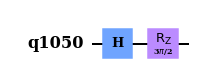

In [1121]:
## QCEngine Constructed SQRT(NOT) Function 
## ( H + [-P90] + H )

# Place an H (Hadamard) gate on the circuit
# Note: Qiskit rotates in Radians not Degrees so the correct calculation needs to be made
# Place an Rz gate with a Pi/2 rotation = 90 Degrees 

# First Root of Not Gate (Establish)
circ.h(qr[0])
circ.rz( np.pi*3/2 , qr[0]) # 90 Degree Phase Rotation (using negative for consistency)
#circ.h(qr[0])

# [Uncomment to illustrate]
#
# Second Root of Not Gate (Reverse) 
# circ.h(qr[0])
# circ.rz( -np.pi/2 , qr[0]) # 90 Degree Phase Rotation (using negative for consistency)
# circ.h(qr[0])



# Draw the circuit
circ.draw(output='mpl')

In [1122]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([-0.5-0.5j, -0.5+0.5j])

In [1123]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(quantum_state)

Normalized Result:  0.5
Normalized Result:  0.5


The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  -2.356194490192345
Angle:  -202.5
The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  2.356194490192345
Angle:  202.5


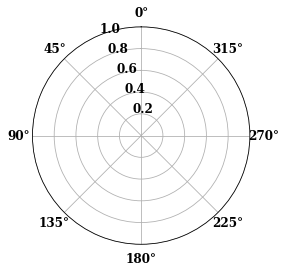

In [1124]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve : appears 90 Degrees
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

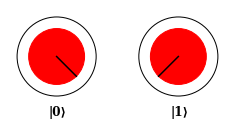

In [1125]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(quantum_state)

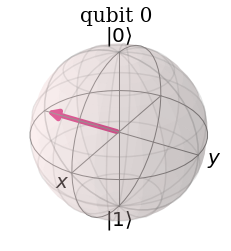

In [1126]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

In [1127]:
quantum_state

array([-0.5-0.5j, -0.5+0.5j])

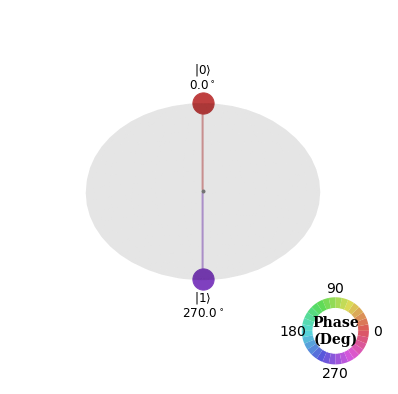

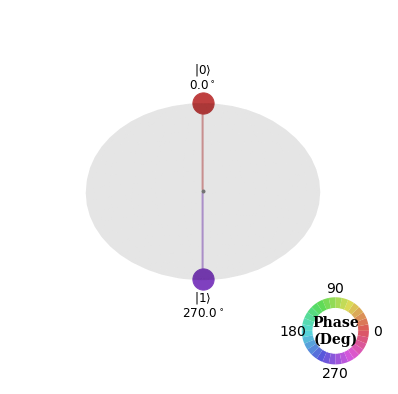

In [1128]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 

In [1129]:
import numpy as np

from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from IPython.display import display, Math, Latex

from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec

qr = QuantumRegister(1)
circ = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 90;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

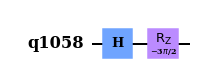

In [1130]:
## QCEngine Constructed SQRT(NOT) Function 
## ( H + [-P90] + H )

# Place an H (Hadamard) gate on the circuit
# Note: Qiskit rotates in Radians not Degrees so the correct calculation needs to be made
# Place an Rz gate with a Pi/2 rotation = 90 Degrees 

# First Root of Not Gate (Establish)
circ.h(qr[0])
circ.rz( - np.pi*3/2 , qr[0]) # 90 Degree Phase Rotation (using negative for consistency)
#circ.h(qr[0])

# [Uncomment to illustrate]
#
# Second Root of Not Gate (Reverse) 
# circ.h(qr[0])
# circ.rz( -np.pi/2 , qr[0]) # 90 Degree Phase Rotation (using negative for consistency)
# circ.h(qr[0])



# Draw the circuit
circ.draw(output='mpl')

In [1131]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(circ, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([-0.5+0.5j, -0.5-0.5j])

In [1132]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(quantum_state)

Normalized Result:  0.5
Normalized Result:  0.5


The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  2.356194490192345
Angle:  67.5
The original complex number Re{0}, Im{0}, and Length : 0.707107
Phase:  -2.356194490192345
Angle:  -67.5


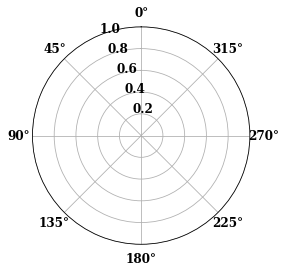

In [1133]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve : appears 90 Degrees
# Plot both vectors and phase / angle (if non-zero)

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

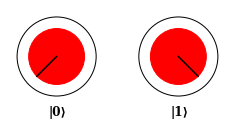

In [1134]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(quantum_state)

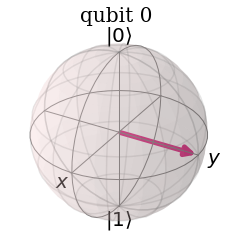

In [1135]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

In [1136]:
quantum_state

array([-0.5+0.5j, -0.5-0.5j])

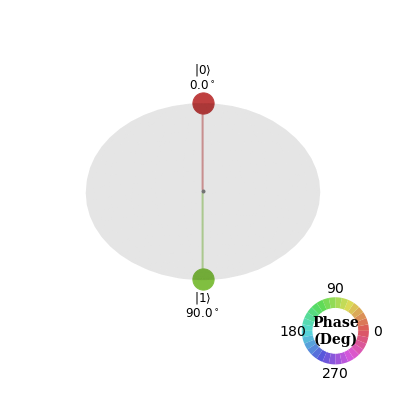

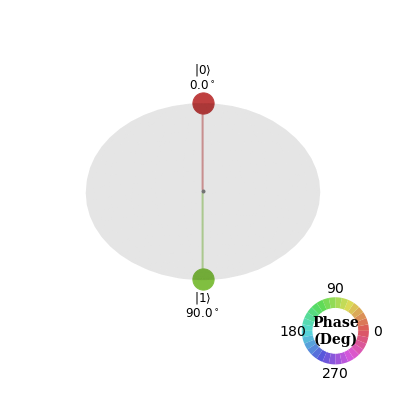

In [1137]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 

In [1138]:
# Import Qiskit, and 

import numpy as np
from qiskit import Aer, QuantumCircuit, QuantumRegister, execute
from qiskit.visualization import plot_histogram
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_bloch_multivector
from IPython.display import display, Math, Latex
from circle_plot import *
from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec


# set up a Quantum register of 1 Qubit, call it "qr"
qr = QuantumRegister(1)

# set up a Quantum Circuit with the quantum register, call it "qcirc"
qcirc = QuantumCircuit(qr)


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
        
# Helper Funtion for print Polar Phase(s)
#      
def plot_polar(state_vector):
    pi_radians = 180;
    for x in state_vector:
        plt.polar([0,cmath.phase(x)],[0,abs(x)],marker='o')
        print("The original complex number Re{%d}, Im{%d}, and Length : %f" % (x.real, x.imag, abs(x)))
        print("Phase: ",cmath.phase(x))
        if cmath.phase(x) != 0:
            print("Angle: ", pi_radians/(np.pi/cmath.phase(x)))

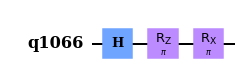

In [1139]:
## Place the circuit in super position and execute a 180dg phase change gate on it.

qcirc.h(qr[0])
qcirc.rz(np.pi, qr[0])
qcirc.rx(np.pi, qr[0])
#qcirc.h(qr[0])

# Draw the circuit
qcirc.draw(output='mpl')

In [1140]:
# Use the BasicAer statevector_simulator backend, submit the job, preview the quantum state

from qiskit import BasicAer
backend_sv_sim = BasicAer.get_backend('statevector_simulator')

job_sim = execute(qcirc, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(qcirc, decimals=3)

# Output the quantum state vector (Amplitude of zero and one state respectively)
quantum_state

array([ 0.707+0.j, -0.707-0.j])

In [1141]:
# Print out normalized statevector  (to gain probabilities)
#
normalize_state_Vector(quantum_state)

Normalized Result:  0.5
Normalized Result:  0.5


The original complex number Re{0}, Im{0}, and Length : 0.707000
Phase:  0.0
The original complex number Re{0}, Im{0}, and Length : 0.707000
Phase:  -3.141592653589793
Angle:  -180.0


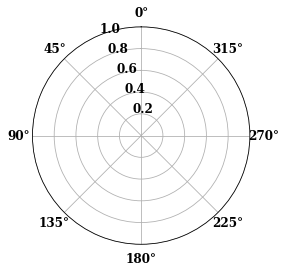

In [1142]:
# Plot Polar Coordinates for intuitions sake - provides an idea of the angle of the plot on the curve

P.clf()
sp = P.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)

plot_polar(quantum_state)

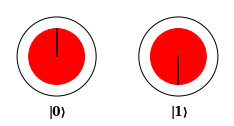

In [1143]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(quantum_state)

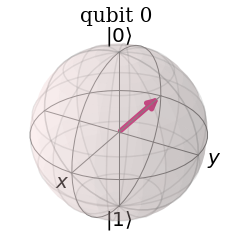

In [1144]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

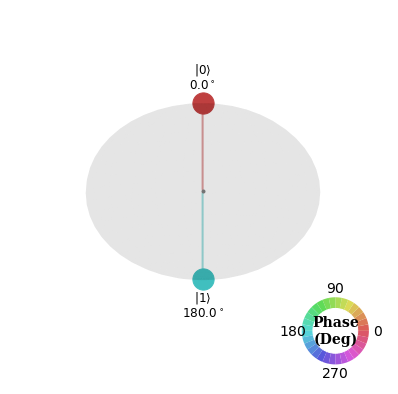

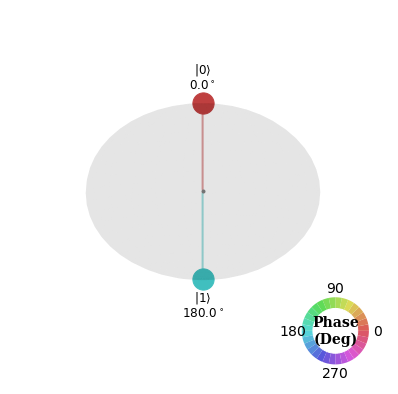

In [1145]:
plot_state_qsphere(quantum_state, show_state_labels=True, show_state_angles=True) 